# 의사결정나무 

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [232]:
# '재구매여부' 0 삭제
df_final = pd.read_excel('Real_final_data.xlsx')

In [233]:
df_final

,Unnamed: 0,ID,결혼유무,연령,결제등록카드,유입경로,자녀여부,구매시월령(수정),구매금액,결제금액,물품대분류,브랜드,중분류,재구매횟수(재구매강도),할인율,누적결제금액,제품구매수,주문번호
0,0,201901060753970,기혼,34,신한은행,인스타그램,No,32,14000,13860,기타,Go-MINI,장난감,0,0.010000,54083,3,201901291956704
1,1,201901060753970,기혼,34,신한은행,인스타그램,No,32,39000,38610,기타,캐스돈,장난감,0,0.010000,54083,3,201902142029766
2,2,201901060753970,기혼,34,신한은행,인스타그램,No,32,53920,36769,팬티,하기스,팬티형기저귀,0,0.318082,54083,3,201911203080517
3,3,201901110757720,기혼,34,농협회원조합,네이버블로그,Yes,23,14000,13860,기타,Go-MINI,장난감,0,0.010000,3800,3,201911203080500
4,4,201901110757720,기혼,34,농협회원조합,네이버블로그,Yes,23,11900,10602,SKC,그린핑거,화장품,0,0.109076,3800,3,201907082570562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195228,195228,201901280777500,미혼,33,농협회원조합,인스타그램,No,4,24800,12400,FC,화이트,생리대,0,0.500000,9240,1,20200627234748-38031514344
195229,195229,201908070956389,기혼,34,신한카드,인스타그램,Yes,60,24800,12400,FC,화이트,생리대,0,0.500000,3000,1,20200630153549-14724149170
195230,195230,201907300950662,기혼,32,농협회원조합,네이버카페,Yes,11,24800,12400,FC,화이트,생리대,0,0.500000,5841,1,20200630195525-63749681509
195231,195231,201912191052904,혼인여부무,연령무,결제등록무,유입경로무,자녀여부무,4,0,0,FC,화이트,생리대,0,0.262948,3000,1,20200629235112-12595707191


In [234]:
df_final.drop(['Unnamed: 0', 'ID', '결혼유무', '결제등록카드', '구매금액', '물품대분류', '브랜드', '누적결제금액', '제품구매수', '주문번호'], axis=1, inplace=True)
df_final.rename(columns={'재구매횟수(재구매강도)': '재구매횟수'}, inplace=True)

In [235]:
df_final.columns

Index(['연령', '유입경로', '자녀여부', '구매시월령(수정)', '결제금액', '중분류', '재구매횟수', '할인율'], dtype='object')

In [236]:
df_final

,연령,유입경로,자녀여부,구매시월령(수정),결제금액,중분류,재구매횟수,할인율
0,34,인스타그램,No,32,13860,장난감,0,0.010000
1,34,인스타그램,No,32,38610,장난감,0,0.010000
2,34,인스타그램,No,32,36769,팬티형기저귀,0,0.318082
3,34,네이버블로그,Yes,23,13860,장난감,0,0.010000
4,34,네이버블로그,Yes,23,10602,화장품,0,0.109076
...,...,...,...,...,...,...,...,...
195228,33,인스타그램,No,4,12400,생리대,0,0.500000
195229,34,인스타그램,Yes,60,12400,생리대,0,0.500000
195230,32,네이버카페,Yes,11,12400,생리대,0,0.500000
195231,연령무,유입경로무,자녀여부무,4,0,생리대,0,0.262948


In [237]:
df2 = df_final[df_final['재구매횟수'] != 0]
df2

,연령,유입경로,자녀여부,구매시월령(수정),결제금액,중분류,재구매횟수,할인율
6,28,네이버블로그,Yes,8,154383,팬티형기저귀,15,0.275605
7,28,네이버블로그,Yes,6,76520,젖병,15,0.406822
8,28,네이버블로그,Yes,12,17740,주방용품,15,0.248305
9,28,네이버블로그,Yes,11,25000,생리대,15,0.500000
10,28,네이버블로그,Yes,11,13246,주방용품,15,0.344257
...,...,...,...,...,...,...,...,...
195113,29,인스타그램,Yes,11,3722,생리대,1,0.332975
195181,36,인스타그램,No,11,3969,생리대,1,0.288710
195182,36,인스타그램,No,11,5078,생리대,1,0.109123
195203,29,네이버블로그,Yes,59,5078,생리대,1,0.109123


In [238]:
df2 = df2[df2['연령']!='연령무']
df2

,연령,유입경로,자녀여부,구매시월령(수정),결제금액,중분류,재구매횟수,할인율
6,28,네이버블로그,Yes,8,154383,팬티형기저귀,15,0.275605
7,28,네이버블로그,Yes,6,76520,젖병,15,0.406822
8,28,네이버블로그,Yes,12,17740,주방용품,15,0.248305
9,28,네이버블로그,Yes,11,25000,생리대,15,0.500000
10,28,네이버블로그,Yes,11,13246,주방용품,15,0.344257
...,...,...,...,...,...,...,...,...
195113,29,인스타그램,Yes,11,3722,생리대,1,0.332975
195181,36,인스타그램,No,11,3969,생리대,1,0.288710
195182,36,인스타그램,No,11,5078,생리대,1,0.109123
195203,29,네이버블로그,Yes,59,5078,생리대,1,0.109123


In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
encoding_columns = ['유입경로','자녀여부','중분류']
not_encoding_columns =['연령','구매시월령(수정)','결제금액','할인율','재구매횟수']

In [241]:
enc_classes={}
def encoding_label(x):
    le=LabelEncoder()
    le.fit(x)
    label=le.transform(x)
    
    enc_classes[x.name]= le.classes_

    return label

In [242]:
d1= df2[encoding_columns].apply(encoding_label)
d2 = df2[not_encoding_columns]
data=d1.join(d2)
data.head()

,유입경로,자녀여부,중분류,연령,구매시월령(수정),결제금액,할인율,재구매횟수
6,1,1,29,28,8,154383,0.275605,15
7,1,1,21,28,6,76520,0.406822,15
8,1,1,22,28,12,17740,0.248305,15
9,1,1,6,28,11,25000,0.500000,15
10,1,1,22,28,11,13246,0.344257,15


In [243]:
data.loc[(df2.재구매횟수 >= 2), '재구매횟수'] = 2

In [244]:
data

,유입경로,자녀여부,중분류,연령,구매시월령(수정),결제금액,할인율,재구매횟수
6,1,1,29,28,8,154383,0.275605,2
7,1,1,21,28,6,76520,0.406822,2
8,1,1,22,28,12,17740,0.248305,2
9,1,1,6,28,11,25000,0.500000,2
10,1,1,22,28,11,13246,0.344257,2
...,...,...,...,...,...,...,...,...
195113,6,1,6,29,11,3722,0.332975,1
195181,6,0,6,36,11,3969,0.288710,1
195182,6,0,6,36,11,5078,0.109123,1
195203,1,1,6,29,59,5078,0.109123,1


In [245]:
df_raw_x2 = data.drop('재구매횟수',axis=1)
df_raw_y2 = data['재구매횟수']

In [246]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x2,df_raw_y2,test_size=0.4,random_state=1234)

In [269]:
v_feature_name=df_train_x.columns

scaler=StandardScaler()

df_scaled=scaler.fit_transform(df_raw_x2)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,유입경로,자녀여부,중분류,연령,구매시월령(수정),결제금액,할인율
0,-1.026816,0.493304,1.012931,-1.640127,-0.160325,5.991877,0.167108
1,-1.026816,0.493304,0.293748,-1.640127,-0.316360,2.422870,1.109689
2,-1.026816,0.493304,0.383645,-1.640127,0.151744,-0.271429,-0.029001
3,-1.026816,0.493304,-1.054721,-1.640127,0.073727,0.061347,1.779028
4,-1.026816,0.493304,0.383645,-1.640127,0.073727,-0.477421,0.660265


In [270]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled, df_raw_y2,random_state=1234, test_size=0.4, shuffle = True)

print('train data X size:', df_train_x.shape)
print('train data Y size:', df_train_y.shape)
print('test data X size:', df_test_x.shape)
print('test data Y size:', df_test_y.shape)

train data X size: (83559, 7)
train data Y size: (83559,)
test data X size: (55706, 7)
test data Y size: (55706,)


# 의사결정나무

In [271]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set : 0.973
Score on test set : 0.699


In [273]:
train_score=[];test_score=[];
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(random_state=1234,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_depth=pd.DataFrame()
df_score_depth["depth"]=para_depth
df_score_depth["Trainscore"]=train_score
df_score_depth["TestScore"]=test_score
df_score_depth.round(3)

,depth,Trainscore,TestScore
0,1,0.795,0.797
1,2,0.795,0.797
2,3,0.796,0.795
3,4,0.796,0.796
4,5,0.796,0.796
5,6,0.797,0.797
6,7,0.797,0.797
7,8,0.799,0.795
8,9,0.800,0.793
9,10,0.803,0.793


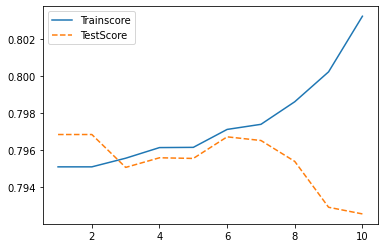

In [274]:
df_score_depth.round(3)
plt.plot(para_depth, train_score, linestyle='-',label="Trainscore")
plt.plot(para_depth, test_score, linestyle='--',label="TestScore")
plt.legend()

In [276]:
train_score=[];test_score=[];
para_split=[n_split *10 for n_split in range(1,11)]

for v_min_saples_split in para_split:
    tree=DecisionTreeClassifier(random_state=1234,max_depth=6, min_samples_split=v_min_saples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["Trainscore"]=train_score
df_score_split["TestScore"]=test_score
df_score_split.round(3)

,MinSamplesSplit,Trainscore,TestScore
0,10,0.797,0.797
1,20,0.797,0.797
2,30,0.797,0.797
3,40,0.797,0.797
4,50,0.797,0.797
5,60,0.797,0.797
6,70,0.797,0.797
7,80,0.797,0.797
8,90,0.797,0.797
9,100,0.797,0.797


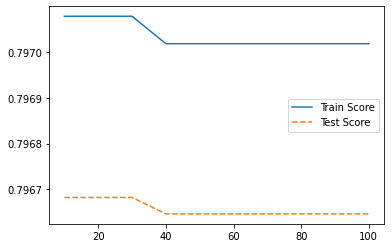

In [277]:
plt.plot(para_split,train_score,linestyle='-',label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.legend()

In [278]:
train_score=[]; test_score=[];
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_leaf=v_min_samples_leaf,max_depth=6, min_samples_split=30)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Testscore"]=test_score

df_score_leaf.round(3)


,MinSamplesLeaf,TrainScore,Testscore
0,1,0.797,0.797
1,2,0.797,0.797
2,3,0.797,0.797
3,4,0.797,0.797
4,5,0.797,0.797
5,6,0.797,0.797
6,7,0.797,0.797
7,8,0.797,0.797
8,9,0.797,0.797
9,10,0.797,0.797


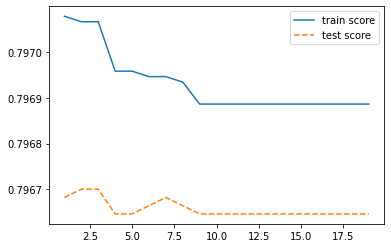

In [279]:
plt.plot(para_leaf,train_score,linestyle='-',label='train score')
plt.plot(para_leaf,test_score,linestyle='--',label='test score')
plt.legend()

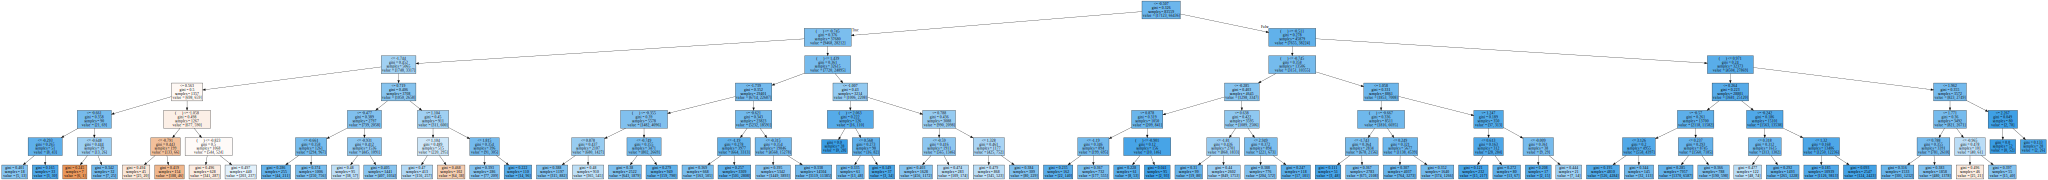

In [280]:
tree_final = DecisionTreeClassifier(min_samples_leaf=7,min_samples_split=30,max_depth=6,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_final,out_file="tree_final.dot",feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [288]:
rf_final=DecisionTreeClassifier(min_samples_leaf=7,min_samples_split=30,max_depth=6,random_state=1234)

rf_final.fit(df_train_x,df_train_y)

y_pred=rf_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.797
TEST set 정확도 : 0.797
Confusion matrix:
[[  316 11002]
 [  324 44064]]


In [289]:
from sklearn.metrics import classification_report
report = classification_report(df_test_y, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.49      0.03      0.05     11318
           2       0.80      0.99      0.89     44388

    accuracy                           0.80     55706
   macro avg       0.65      0.51      0.47     55706
weighted avg       0.74      0.80      0.72     55706



Text(0, 0.5, '설명변수')

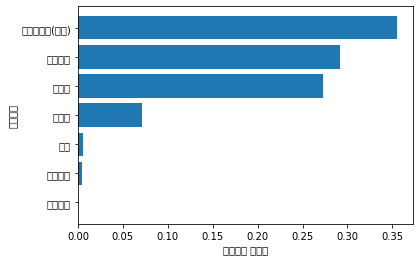

In [281]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [287]:
df_importance

,Feature,Importance
1,자녀여부,0.000000
0,유입경로,0.004115
3,연령,0.005643
2,중분류,0.071007
6,할인율,0.272776
5,결제금액,0.291553
4,구매시월령(수정),0.354906


# 랜덤포레스트

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
model_pipe = Pipeline( [('scaler',MinMaxScaler()), ('model',RandomForestClassifier())] )

In [152]:
param_list = {'model__criterion':['gini','entropy'],
             'model__class_weight':[None,'balanced'],
             'model__n_estimators' : [40,50,60,70,80,90,100],
             'model__max_depth':[2,3,4,5,6],
             'model__min_samples_split':[10,20,30,40],
             'model__min_samples_leaf':[10,20,30,40]}

In [154]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("정확도 Training Set : {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("정확도 Test Set : {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

정확도 Training Set : 0.973
정확도 Test Set : 0.781


In [155]:
train_accuracy=[];test_accuracy=[];
para_n_tree= [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_n= pd.DataFrame()
rf_accuracy_n["n_estimators"]=para_n_tree
rf_accuracy_n["Train Accuracy"]=train_accuracy
rf_accuracy_n["Test Accuracy"]=test_accuracy

In [156]:
rf_accuracy_n.round(3)

,n_estimators,Train Accuracy,Test Accuracy
0,10,0.964,0.762
1,20,0.970,0.774
2,30,0.972,0.777
3,40,0.973,0.778
4,50,0.973,0.779
5,60,0.973,0.779
6,70,0.973,0.780
7,80,0.973,0.781
8,90,0.973,0.781
9,100,0.973,0.781


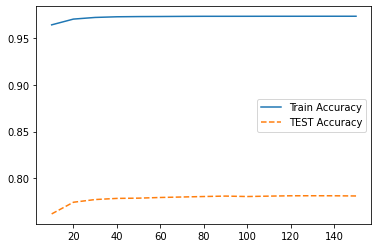

In [157]:
plt.plot(para_n_tree,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [158]:
train_accuracy=[];test_accuracy=[];
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth,n_estimators=80, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_depth= pd.DataFrame()
rf_accuracy_depth["Depth"]=para_depth
rf_accuracy_depth["Train Accuracy"]=train_accuracy
rf_accuracy_depth["Test Accuracy"]=test_accuracy

In [162]:
rf_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.795,0.797
1,2,0.795,0.797
2,3,0.795,0.797
3,4,0.797,0.797
4,5,0.797,0.797
5,6,0.797,0.797
6,7,0.797,0.797
7,8,0.797,0.797
8,9,0.798,0.797
9,10,0.799,0.797


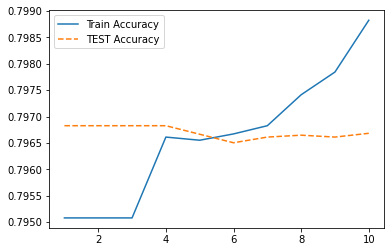

In [163]:
plt.plot(para_depth,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [164]:
train_accuracy=[];test_accuracy=[];
para_split= [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth = 7,n_estimators=80, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_split= pd.DataFrame()
rf_accuracy_split["Min_samples_split"]=para_split
rf_accuracy_split["Train Accuracy"]=train_accuracy
rf_accuracy_split["Test Accuracy"]=test_accuracy
rf_accuracy_split.round(3)

,Min_samples_split,Train Accuracy,Test Accuracy
0,10,0.797,0.797
1,20,0.797,0.797
2,30,0.797,0.797
3,40,0.797,0.797
4,50,0.797,0.797
5,60,0.797,0.797
6,70,0.797,0.797
7,80,0.797,0.797
8,90,0.797,0.797
9,100,0.797,0.797


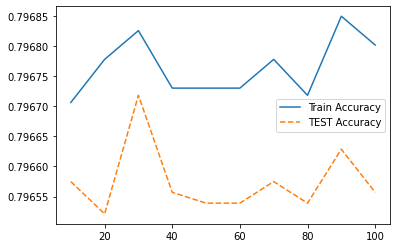

In [165]:
plt.plot(para_split,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [168]:
train_accuracy=[];test_accuracy=[];
para_leaf= [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=30,max_depth = 7,n_estimators=80, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_leaf= pd.DataFrame()
rf_accuracy_leaf["Min_samples_leaf"]=para_leaf
rf_accuracy_leaf["Train Accuracy"]=train_accuracy
rf_accuracy_leaf["Test Accuracy"]=test_accuracy

In [169]:
rf_accuracy_leaf.round(3)

,Min_samples_leaf,Train Accuracy,Test Accuracy
0,10,0.797,0.797
1,20,0.797,0.797
2,30,0.797,0.797
3,40,0.797,0.797
4,50,0.797,0.796
5,60,0.797,0.797
6,70,0.797,0.797
7,80,0.797,0.797
8,90,0.797,0.797
9,100,0.797,0.797


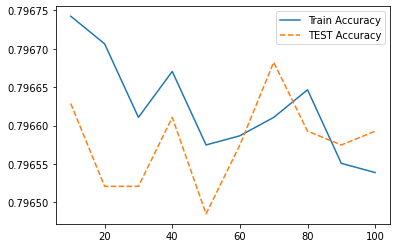

In [171]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [172]:
rf_final=RandomForestClassifier(min_samples_leaf=40,min_samples_split=30,max_depth=7,n_estimators=80,random_state=1234)

rf_final.fit(df_train_x,df_train_y)

y_pred=rf_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.797
TEST set 정확도 : 0.797
Confusion matrix:
[[  268 11050]
 [  280 44108]]


In [213]:
from sklearn.metrics import classification_report
report = classification_report(df_test_y, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.49      0.02      0.05     11318
           2       0.80      0.99      0.89     44388

    accuracy                           0.80     55706
   macro avg       0.64      0.51      0.47     55706
weighted avg       0.74      0.80      0.72     55706



Text(0, 0.5, '설명변수')

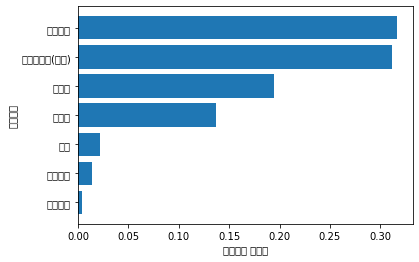

In [212]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [174]:
df_importance

,Feature,Importance
1,자녀여부,0.004174
0,유입경로,0.013713
3,연령,0.021982
2,중분류,0.137426
6,할인율,0.194732
4,구매시월령(수정),0.311577
5,결제금액,0.316396


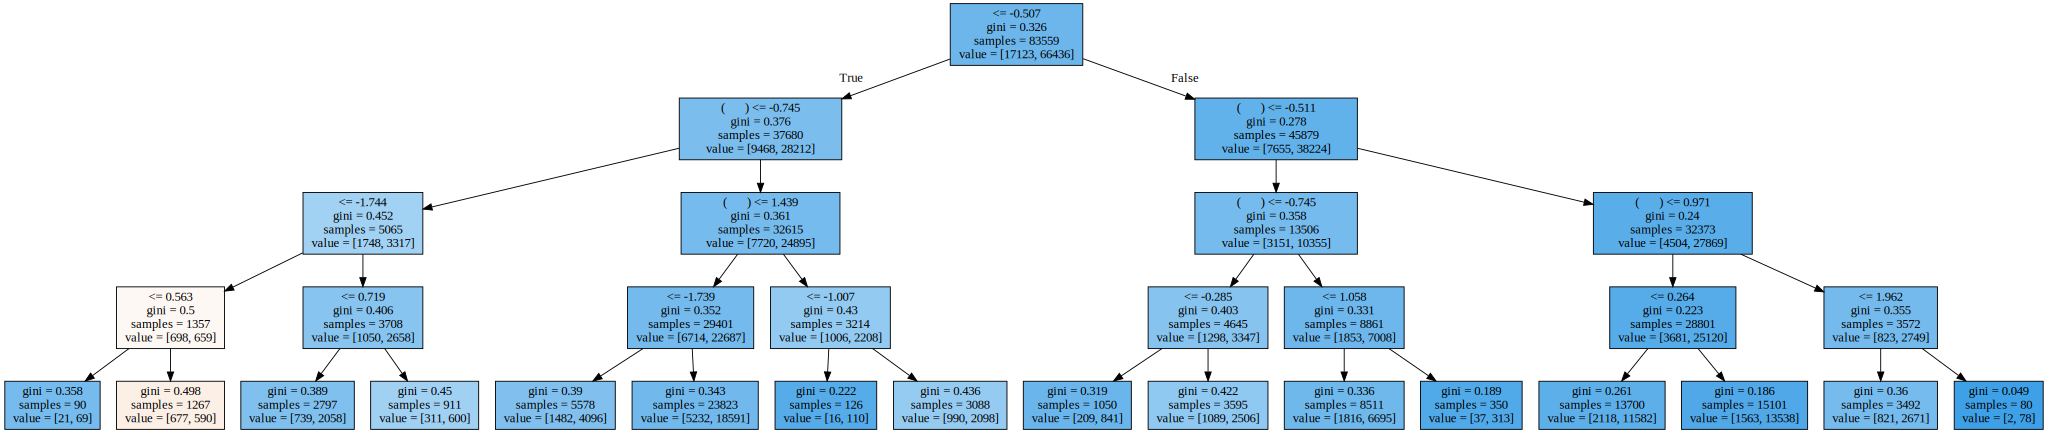

In [185]:
rf_graph=DecisionTreeClassifier(min_samples_leaf=50,min_samples_split=30,max_depth=4,random_state=1234)
rf_graph.fit(df_train_x,df_train_y)

export_graphviz(rf_graph,out_file="rf_depth.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("rf_depth.dot")as f:
    dot_graph=f.read()
    display(graphviz.Source(dot_graph))

# 그레디언트 부스팅

In [208]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("정확도 Training Set : {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("정확도 Test Set : {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

정확도 Training Set : 0.061
정확도 Test Set : 0.051


In [209]:
train_accuracy=[];test_accuracy=[];
para_lr= [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_lr= pd.DataFrame()
gb_accuracy_lr["learning rate"]=para_lr
gb_accuracy_lr["Train Accuracy"]=train_accuracy
gb_accuracy_lr["Test Accuracy"]=test_accuracy

In [214]:
gb_accuracy_lr.round(3)

,learning rate,Train Accuracy,Test Accuracy
0,0.1,0.796,0.796
1,0.2,0.797,0.796
2,0.3,0.798,0.796
3,0.4,0.799,0.796
4,0.5,0.800,0.796
5,0.6,0.801,0.795
6,0.7,0.801,0.795
7,0.8,0.802,0.793
8,0.9,0.802,0.792


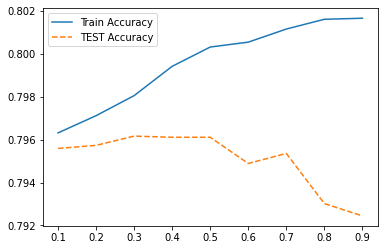

In [215]:

plt.plot(para_lr,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_lr,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [216]:
train_accuracy=[];test_accuracy=[];
para_n_tree= [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.1 ,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_n= pd.DataFrame()
gb_accuracy_n["n_estimators"]=para_n_tree
gb_accuracy_n["Train Accuracy"]=train_accuracy
gb_accuracy_n["Test Accuracy"]=test_accuracy
gb_accuracy_n.round(3)

,n_estimators,Train Accuracy,Test Accuracy
0,10,0.795,0.797
1,20,0.795,0.797
2,30,0.797,0.797
3,40,0.797,0.797
4,50,0.797,0.797
5,60,0.797,0.797
6,70,0.796,0.796
7,80,0.796,0.796
8,90,0.796,0.796
9,100,0.796,0.796


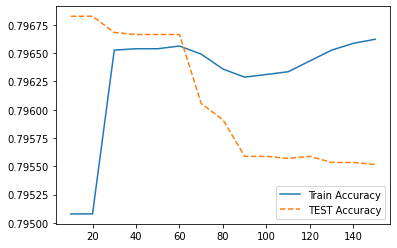

In [217]:
plt.plot(para_n_tree,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [218]:
train_accuracy=[];test_accuracy=[];
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,n_estimators=60,learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_depth= pd.DataFrame()
gb_accuracy_depth["Depth"]=para_depth
gb_accuracy_depth["Train Accuracy"]=train_accuracy
gb_accuracy_depth["Test Accuracy"]=test_accuracy
gb_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.795,0.797
1,2,0.795,0.797
2,3,0.797,0.797
3,4,0.797,0.796
4,5,0.798,0.797
5,6,0.799,0.797
6,7,0.803,0.796
7,8,0.809,0.797
8,9,0.817,0.796
9,10,0.828,0.795


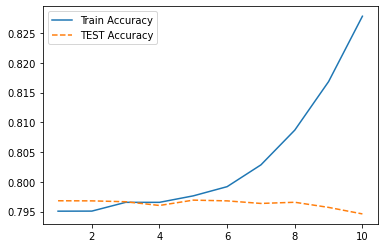

In [219]:
plt.plot(para_depth,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [220]:
train_accuracy=[];test_accuracy=[];
para_split= [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split=v_min_samples_split,max_depth = 6,n_estimators=60,learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_split= pd.DataFrame()
gb_accuracy_split["Min_samples_split"]=para_split
gb_accuracy_split["Train Accuracy"]=train_accuracy
gb_accuracy_split["Test Accuracy"]=test_accuracy
gb_accuracy_split.round(3)

,Min_samples_split,Train Accuracy,Test Accuracy
0,10,0.799,0.796
1,20,0.800,0.796
2,30,0.799,0.796
3,40,0.799,0.796
4,50,0.799,0.796
5,60,0.799,0.796
6,70,0.799,0.796
7,80,0.799,0.797
8,90,0.799,0.797
9,100,0.799,0.796


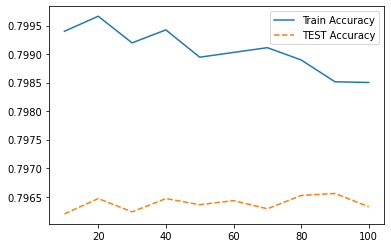

In [221]:
plt.plot(para_split,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [222]:
train_accuracy=[];test_accuracy=[];
para_leaf= [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=20,max_depth = 6,n_estimators=60, learning_rate=0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_leaf= pd.DataFrame()
gb_accuracy_leaf["Min_samples_leaf"]=para_leaf
gb_accuracy_leaf["Train Accuracy"]=train_accuracy
gb_accuracy_leaf["Test Accuracy"]=test_accuracy
gb_accuracy_leaf.round(3)

,Min_samples_leaf,Train Accuracy,Test Accuracy
0,10,0.799,0.797
1,20,0.798,0.796
2,30,0.799,0.796
3,40,0.798,0.796
4,50,0.798,0.796
5,60,0.798,0.797
6,70,0.798,0.796
7,80,0.798,0.796
8,90,0.797,0.796
9,100,0.797,0.797


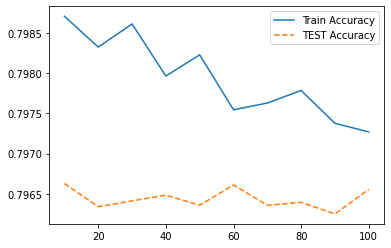

In [223]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [224]:
gb_final=GradientBoostingClassifier(min_samples_leaf=10,min_samples_split=20,max_depth=6,n_estimators=60,learning_rate=0.1,random_state=1234)

gb_final.fit(df_train_x,df_train_y)

y_pred=gb_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.799
TEST set 정확도 : 0.797
Confusion matrix:
[[  356 10962]
 [  367 44021]]


In [228]:
from sklearn.metrics import classification_report
report = classification_report(df_test_y, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.49      0.03      0.06     11318
           2       0.80      0.99      0.89     44388

    accuracy                           0.80     55706
   macro avg       0.65      0.51      0.47     55706
weighted avg       0.74      0.80      0.72     55706



Text(0, 0.5, '설명변수')

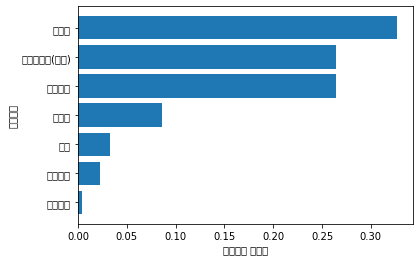

In [229]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [230]:
df_importance

,Feature,Importance
1,자녀여부,0.003988
0,유입경로,0.022856
3,연령,0.032487
2,중분류,0.086028
5,결제금액,0.263977
4,구매시월령(수정),0.264073
6,할인율,0.326592
